# Simulating the recordings of an accelerometer

## Install dependencies

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import derivative

## Create input

We need to define two things:

1. The world in which the accelerometer moves. This is given by the accelerations that exist on it (typically gravitation). We'll code this in the object `a`.
2. The way the accelerometer moves, given by the objects `R` (for displacement) and `omega` (for rotations).

Please note that `a` and `R` are column vectors, and `omega` is a square matrix with the same dimensionality as the vectors (i.e.: $2 \times 2$ for plane vectors, $3 \times 3$ for spatial vectors).

In [2]:
# Parameters
g = 9.81*0 # Gravitational acceleration (unsigned)
R0 = 1 # Radius of rotation
w = 2*np.pi # Angular speed

def a(t):
    '''Acceleration in the inertial system'''
    return(np.matrix([[.0], 
                      [-g]]))

def R(t):
    '''Relative displacement'''    
    return(R0 * np.matrix([[np.cos(w*t)],
                           [np.sin(w*t)]]))

def omega(t):
    '''Relative rotation matrix'''
    return(np.matrix([[+np.cos(w*t), np.sin(w*t)], 
                      [-np.sin(w*t), np.cos(w*t)]]))

## Calculate the acceleration "felt" by the accelerometer

Using the formula:

$$
\vec a'_{ni}(t) = \Omega(t) \left(\vec a_{i}(t) - \ddot{\vec R}_{i}(t) \right)
$$

In [6]:
def a_ni(t):
    '''Acceleration in the non-intertial system'''
    
    # Auxiliary functions
    def V(t, dx=1e-7, **kwargs):
        '''Numerical estimation of relative speed'''
        return(derivative(R, x0=t, dx=dx, **kwargs))

    def A(t, dx=1e-7, **kwargs):
        '''Numerical estimation of relative acceleration'''
        return(derivative(V, x0=t, dx=dx, **kwargs))
    
    # Rotate external acceleration
    rot_a = omega(t)*a(t)
    
    # Calculate and rotate relative acceleration
    rot_ni = omega(t)*A(t)
    
    # Apply formula
    return(rot_a - rot_ni)

39.47841760435743

## Play and plot

Note: certainly this can be done in a much more elegant and efficient way using vectorization.

In [4]:
# Times to evaluate
ts = np.linspace(0, 1)

# Containers for the accelerations
asx = np.zeros(len(ts)) # In the inertial ...
asy = np.zeros(len(ts))
asnix = np.zeros(len(ts)) # ... and non inertial frame
asniy = np.zeros(len(ts))

# Loop and unpack information
for i in range(len(ts)):
    accels = a(ts[i])
    asx[i] = accels[0]
    asy[i] = accels[1]
    
    accels_ni = a_ni(ts[i])
    asnix[i] = accels_ni[0]
    asniy[i] = accels_ni[1]

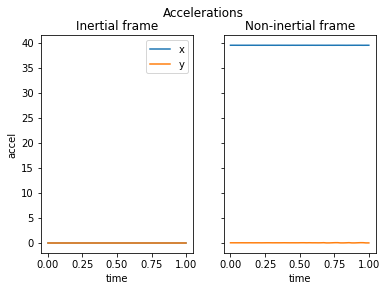

In [5]:
fig, axs = plt.subplots(1, 2, sharey=True)
fig.suptitle('Accelerations')

axs[0].set_title('Inertial frame')
axs[0].set_ylabel('accel')
axs[0].plot(ts, asx, label = 'x')
axs[0].plot(ts, asy, label = 'y')
# axs[0].plot(ts, np.sqrt(asx**2 + asy**2), label = 'absolute')

axs[1].set_title('Non-inertial frame')
axs[1].plot(ts, asnix, label = 'x')
axs[1].plot(ts, asniy, label = 'y')
# axs[1].plot(ts, np.sqrt(asnix**2 + asniy**2), label = 'absolute')

axs[0].legend()

for ax in axs.flat:
    ax.set_xlabel('time')